In [57]:
from astropy.io import ascii
from astropy.io import fits
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
distData = ascii.read('apjaa75cat2_mrt.txt')
crossData = ascii.read('tgas_combined_obs.txt')

In [3]:
distData

KIC,teff,e_teff,logg,e_logg,feh,e_feh,r-dir,E_r-dir,e_r-dir,d-dir,E_d-dir,e_d-dir,av-dir,r-dir-cor,E_r-dir-cor,e_r-dir-cor,d-dir-cor,E_d-dir-cor,e_d-dir-cor,av-dir-cor,r-grid,E_r-grid,e_r-grid,d-grid,E_d-grid,e_d-grid,av-grid,E_av-grid,e_av-grid,r-grid-cor,E_r-grid-cor,e_r-grid-cor,d-grid-cor,E_d-grid-cor,e_d-grid-cor,av-grid-cor,E_av-grid-cor,e_av-grid-cor,r-gaia,E_r-gaia,e_r-gaia,d-gaia,E_d-gaia,e_d-gaia,av-gaia,evstate,src
,K,K,[cm/s],[cm/s],[Sun],[Sun],solRad,solRad,solRad,pc,pc,pc,mag,solRad,solRad,solRad,pc,pc,pc,mag,solRad,solRad,solRad,pc,pc,pc,mag,mag,mag,solRad,solRad,solRad,pc,pc,pc,mag,mag,mag,solRad,solRad,solRad,pc,pc,pc,mag,,
int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,int64,str3
1160789,4739,86,2.307,0.014,-0.34,0.06,10.835,0.538,0.538,656,42,42,0.246,9.846,0.489,0.489,597,38,38,0.227,11.29,0.375,0.307,677,24,19,0.133,0.07,0.07,11.295,0.341,0.307,679,25,21,0.133,0.07,0.07,11.922,7.104,2.131,754,405,147,0.545,-1,apo
1161618,4763,86,2.442,0.009,-0.009,0.06,10.964,0.307,0.307,806,39,39,0.085,11.011,0.309,0.309,810,39,39,0.086,11.214,0.078,0.067,800,6,6,0.223,0.08,0.07,11.21,0.089,0.067,801,7,6,0.223,0.07,0.07,11.58,12.526,2.684,808,881,176,0.108,1,apo
1162746,4798,86,2.356,0.02,-0.478,0.06,10.967,0.923,0.923,1452,135,135,0.251,10.88,0.916,0.916,1441,134,134,0.25,11.024,0.801,0.582,1435,114,76,0.353,0.08,0.09,11.017,0.801,0.582,1435,114,76,0.353,0.08,0.08,7.521,44.449,2.615,919,5788,399,0.282,1,apo
1163621,4959,86,2.624,0.008,-0.041,0.06,11.179,0.289,0.289,1722,79,79,0.372,11.337,0.293,0.293,1747,80,80,0.372,11.096,0.181,0.226,1676,39,34,0.383,0.08,0.07,11.136,0.2,0.15,1685,34,27,0.373,0.08,0.08,8.299,28.311,3.033,1216,4349,348,0.385,1,apo
1294385,4825,86,2.936,0.006,0.03,0.06,6.923,0.137,0.137,667,29,29,0.192,6.71,0.133,0.133,646,28,28,0.189,6.933,0.156,0.122,668,17,12,0.073,0.07,0.07,6.578,0.315,0.118,633,31,11,0.043,0.1,0.09,7.806,27.342,2.187,754,2612,209,0.287,-1,apo
1430163,6590,77,4.226,0.018,-0.05,0.101,1.519,0.094,0.094,181,12,12,0.057,1.471,0.091,0.091,176,12,12,0.056,1.475,0.029,0.029,175,4,4,0.103,0.07,0.07,1.458,0.032,0.023,174,4,4,0.103,0.07,0.07,1.532,0.109,0.096,182,13,11,0.057,0,spc
1433730,4727,86,2.51,0.008,-0.102,0.06,12.855,0.314,0.314,1159,54,54,0.5,12.278,0.299,0.299,1107,51,51,0.498,12.642,0.38,0.222,1138,37,17,0.563,0.08,0.09,12.491,0.266,0.495,1124,24,48,0.543,0.09,0.11,-99.0,-99.0,-99.0,--,--,--,-99.0,-1,apo
1433803,4721,86,3.081,0.005,0.198,0.06,5.405,0.099,0.099,405,18,18,0.152,5.231,0.096,0.096,392,17,17,0.149,5.385,0.14,0.086,403,10,6,0.083,0.08,0.08,5.138,0.093,0.073,384,7,6,0.053,0.08,0.08,4.971,0.845,0.591,375,60,40,0.147,0,apo


In [4]:
crossData

KIC,TYC,ra,dec,numax,sig_numax,dnu,sig_dnu,teff,sig_teff,logg,sig_logg,feh,sig_feh,plx,sig_plx,btmag,sig_btmag,vtmag,sig_vtmag,gmag,sig_gmag,rmag,sig_rmag,imag,sig_imag,zmag,sig_zmag,jmag,sig_jmag,hmag,sig_hmag,kmag,sig_kmag,clump,src
int64,str11,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,str3
1160789,2666-1183-1,290.886667,36.872429,25.221,0.76,3.529,0.063,4739.4,86.0,2.307,0.014,-0.34,0.06,1.3499769,0.32179558,11.159,0.051,10.059,0.031,10.418,0.02,9.635,0.02,9.342,0.02,9.195,0.02,8.133,0.021,7.593,0.021,7.497,0.017,-1,apo
1161618,2666-1391-1,291.108918,36.813293,34.363,0.599,4.1,0.029,4762.8,86.0,2.442,0.009,-0.009,0.06,1.2282356,0.35792065,11.905,0.101,10.657,0.054,11.052,0.02,10.138,0.02,9.818,0.02,9.652,0.02,8.542,0.018,7.974,0.026,7.887,0.018,1,apo
1162746,2666-262-1,291.359984,36.819893,28.042,1.268,3.71,0.128,4798.3,86.0,2.356,0.02,-0.478,0.06,0.95244032,0.98071223,13.455,0.392,11.815,0.165,12.203,0.02,11.409,0.02,11.075,0.02,10.878,0.02,9.834,0.022,9.272,0.02,9.183,0.018,1,apo
1163621,2666-55-1,291.554072,36.807381,51.17,0.863,5.005,0.026,4958.7,86.0,2.624,0.008,-0.041,0.06,0.78670806,0.38586438,13.144,0.331,12.044,0.19,12.597,0.02,11.731,0.02,11.401,0.02,11.188,0.02,10.107,0.022,9.558,0.018,9.473,0.018,1,apo
1294385,2666-312-1,291.339547,36.902695,106.498,1.084,9.113,0.015,4825.4,86.0,2.936,0.006,0.03,0.06,1.42516541,0.51526231,12.177,0.156,11.027,0.076,11.363,0.02,10.574,0.02,10.296,0.02,10.139,0.02,9.085,0.018,8.595,0.021,8.465,0.018,-1,apo
1430163,2666-1617-1,290.8884195,37.08936,1775.247,72.128,85.873,1.879,6590.0,77.3,4.226,0.018,-0.05,0.101,5.48607186,0.35214141,10.159,0.027,9.627,0.023,9.694,0.02,9.48,0.02,9.429,0.02,9.459,0.02,8.769,0.026,8.56,0.018,8.529,0.018,0,spc
1433730,2666-211-1,291.709187,37.051514,40.285,0.656,4.092,0.014,4727.4,86.0,2.51,0.008,-0.102,0.06,-0.28072232,0.67320669,12.478,0.205,11.307,0.093,11.814,0.02,10.832,0.02,10.46,0.02,10.213,0.02,9.097,0.022,8.507,0.018,8.39,0.018,-1,apo
1433803,2666-175-1,291.725729,37.038532,150.146,0.997,12.179,0.017,4721.3,86.0,3.081,0.005,0.198,0.06,2.68259048,0.34127036,11.833,0.089,10.503,0.046,10.967,0.02,10.09,0.02,9.814,0.02,9.63,0.02,8.538,0.02,8.046,0.02,7.942,0.018,0,apo
1435467,2666-333-1,292.0826895,37.05981,1382.311,9.148,70.558,0.053,6326.0,77.3,4.108,0.004,0.01,0.101,5.59756204,0.2493433,9.484,0.02,9.017,0.016,9.021,0.02,8.778,0.02,8.685,0.02,8.666,0.02,7.983,0.024,7.753,0.023,7.718,0.017,0,spc


In [5]:
tgasData = fits.open('stacked_tgas.fits')

In [6]:
tgasData[1].data['tycho2_id']

chararray(['', '55-28-1', '55-1191-1', ..., '5192-877-1', '5179-1401-1',
           '5179-1719-1'],
          dtype='<U12')

In [7]:
from astropy.table import Table, join

In [12]:
crossTable = Table(crossData)
tgasTable = Table(tgasData[1].data)

In [13]:
tgasTable.rename_column('tycho2_id', 'TYC')

In [14]:
blah = join(tgasTable, crossTable, keys='TYC')

In [16]:
len(blah)

2207

In [19]:
photoData = fits.open('photoParallaxAnderson17Mini.fits')
photoTable = Table(photoData[1].data)
photoTable.rename_column('tycho2_id', 'TYC')

In [20]:
blah2 = join(photoTable, crossTable, keys='TYC')

In [21]:
len(blah2)

2198

In [23]:
distTable = Table(distData)
blah3 = join(blah2, distTable, keys='KIC')

In [112]:
blah4 = join(blah3, tgasTable, keys='TYC')

In [113]:
blah4

TYC,source_id_1,ra_1,dec_1,J_Ks,M_J,E(B_V),parallax_expectation_value,parallax_variance,l_1,b_1,KIC,ra_2,dec_2,numax,sig_numax,dnu,sig_dnu,teff_1,sig_teff,logg_1,sig_logg,feh_1,sig_feh,plx,sig_plx,btmag,sig_btmag,vtmag,sig_vtmag,gmag,sig_gmag,rmag,sig_rmag,imag,sig_imag,zmag,sig_zmag,jmag,sig_jmag,hmag,sig_hmag,kmag,sig_kmag,clump,src_1,teff_2,e_teff,logg_2,e_logg,feh_2,e_feh,r-dir,E_r-dir,e_r-dir,d-dir,E_d-dir,e_d-dir,av-dir,r-dir-cor,E_r-dir-cor,e_r-dir-cor,d-dir-cor,E_d-dir-cor,e_d-dir-cor,av-dir-cor,r-grid,E_r-grid,e_r-grid,d-grid,E_d-grid,e_d-grid,av-grid,E_av-grid,e_av-grid,r-grid-cor,E_r-grid-cor,e_r-grid-cor,d-grid-cor,E_d-grid-cor,e_d-grid-cor,av-grid-cor,E_av-grid-cor,e_av-grid-cor,r-gaia,E_r-gaia,e_r-gaia,d-gaia,E_d-gaia,e_d-gaia,av-gaia,evstate,src_2,hip,solution_id,source_id_2,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_good_obs_ac,astrometric_n_bad_obs_al,astrometric_n_bad_obs_ac,astrometric_delta_q,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_primary_flag,astrometric_relegation_factor,astrometric_weight_al,astrometric_weight_ac,astrometric_priors_used,matched_observations,duplicated_source,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_mag,phot_variable_flag,l_2,b_2,ecl_lon,ecl_lat
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,K,K,[cm/s],[cm/s],[Sun],[Sun],solRad,solRad,solRad,pc,pc,pc,mag,solRad,solRad,solRad,pc,pc,pc,mag,solRad,solRad,solRad,pc,pc,pc,mag,mag,mag,solRad,solRad,solRad,pc,pc,pc,mag,mag,mag,solRad,solRad,solRad,pc,pc,pc,mag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
str12,int32,float64,float64,float32,float32,float32,float32,float32,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,str3,int64,int64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,int64,str3,int32,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,int32,int32,int32,float32,float64,float64,bool,float32,float32,float32,int32,int16,bool,float32,float32,float32,float32,float32,float32,float32,float32,int32,float64,float64,float64,str13,float64,float64,float64,float64
2652-223-1,1420288,286.250237337,37.4823036491,0.61277,-1.03277,0.0669047,0.879695,0.0153716,68.3328985372,13.633044977,1995859,286.250254,37.482307,46.035,1.153,4.779,0.045,4950.1,86.0,2.578,0.012,-0.189,0.06,0.79446131,0.29580924,12.353,0.165,11.241,0.083,11.619,0.02,10.808,0.02,10.489,0.02,10.308,0.02,9.293,0.02,8.796,0.02,8.653,0.018,1,apo,4950,86,2.578,0.012,-0.189,0.06,11.021,0.391,0.391,1168,61,61,0.266,11.162,0.396,0.396,1182,61,61,0.267,11.236,0.349,0.139,1176,37,18,0.313,0.08,0.08,11.287,0.301,0.162,1180,33,21,0.313,0.08,0.08,11.635,25.917,3.24,1316,2783,384,0.284,1,apo,-2147483648,1635378410781933568,2099077717308058624,1154843,2015.0,286.250237337,0.156439559439,37.4823036491,0.241181393988,0.794461303289,0.295809249963,0.10761470732,0.89874075082,-8.48491521741,0.714813219

In [ ]:
blah3['d-dir'], blah3['d-dir-cor'], blah3['d-grid'], blah3['d-grid-cor'], blah3['d-gaia'], blah3['parallax_expectation_value']

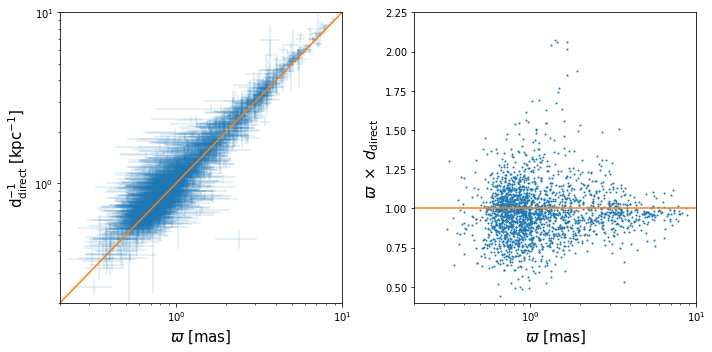

In [127]:
#plt.scatter(blah3['parallax_expectation_value'], 1e3/blah3['d-dir-cor'], s=1)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].errorbar(blah3['parallax_expectation_value'], 1e3/blah3['d-dir-cor'], alpha=0.15, xerr=[np.sqrt(blah3['parallax_variance']), np.sqrt(blah3['parallax_variance'])], yerr=[blah3['E_d-dir-cor']/blah3['d-dir-cor']**2*1e3, blah3['e_d-dir-cor']/blah3['d-dir-cor']**2*1e3], fmt='o', markersize=0)
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlim(0.2, 10)
ax[0].set_ylim(0.2, 10)
ax[0].plot([0.0001, 1000], [0.0001, 1000])
ax[0].set_xlabel(r'$\varpi$ [mas]', fontsize=15)
ax[0].set_ylabel(r'$\mathrm{d}_\mathrm{direct}^{-1} \; [\mathrm{kpc}^{-1}]$', fontsize=15)

ax[1].scatter(blah3['parallax_expectation_value'], blah3['parallax_expectation_value']/(1e3/blah3['d-dir-cor']), s=1)
ax[1].set_ylim(0.4, 2.25)
ax[1].set_xlim(0.2, 10)
ax[1].set_xscale('log')
ax[1].axhline(1, c='C1')
ax[1].set_xlabel(r'$\varpi$ [mas]', fontsize=15)
ax[1].set_ylabel(r'$\varpi \; \times \; d_\mathrm{direct}$', fontsize=15)
fig.tight_layout()
fig.savefig('paper/photoVSseismic.pdf', rasterized=True)

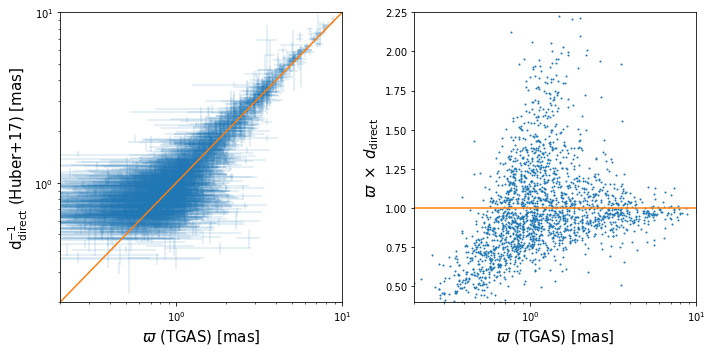

In [118]:
#plt.scatter(blah3['parallax_expectation_value'], 1e3/blah3['d-dir-cor'], s=1)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].errorbar(blah4['parallax'], 1e3/blah4['d-dir-cor'], alpha=0.15, xerr=[blah4['parallax_error'], blah4['parallax_error']], yerr=[blah4['E_d-dir-cor']/blah4['d-dir-cor']**2*1e3, blah4['e_d-dir-cor']/blah4['d-dir-cor']**2*1e3], fmt='o', markersize=0)
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlim(0.2, 10)
ax[0].set_ylim(0.2, 10)
ax[0].plot([0.0001, 1000], [0.0001, 1000])
ax[0].set_xlabel(r'$\varpi$ (TGAS) [mas]', fontsize=15)
ax[0].set_ylabel(r'$\mathrm{d}_\mathrm{direct}^{-1}$ (Huber+17) [mas]', fontsize=15)

ax[1].scatter(blah4['parallax'], blah4['parallax']/(1e3/blah4['d-dir-cor']), s=1)
ax[1].set_ylim(0.4, 2.25)
ax[1].set_xlim(0.2, 10)
ax[1].set_xscale('log')
ax[1].axhline(1, c='C1')
ax[1].set_xlabel(r'$\varpi$ (TGAS) [mas]', fontsize=15)
ax[1].set_ylabel(r'$\varpi \; \times \; d_\mathrm{direct}$', fontsize=15)
fig.tight_layout()
fig.savefig('paper/tgasVSseismic.pdf', rasterized=True)

(0.4, 2.5)

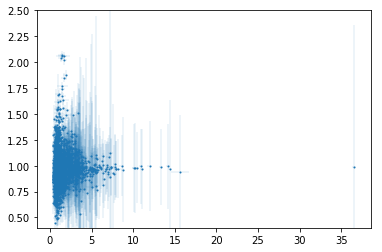

In [77]:
plt.scatter(blah4['parallax_expectation_value'], blah4['parallax_expectation_value']/(1e3/blah4['d-dir-cor']), s=1)
plt.errorbar(blah3['parallax_expectation_value'], blah3['parallax_expectation_value']/(1e3/blah3['d-dir-cor']), \
             xerr=[np.sqrt(blah3['parallax_variance']), np.sqrt(blah3['parallax_variance'])], \
             yerr=[blah3['E_d-dir-cor']/blah3['d-dir-cor']**2*1e3, blah3['e_d-dir-cor']/blah3['d-dir-cor']**2*1e3], \
             fmt='o', markersize=0, alpha=0.1)
plt.ylim(0.4, 2.5)
#plt.xscale('log')

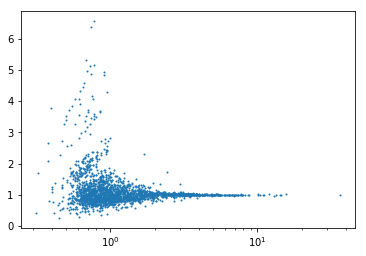

In [47]:
plt.scatter(blah3['parallax_expectation_value'], blah3['parallax_expectation_value']/(1e3/blah3['d-gaia']), s=1)
plt.xscale('log')

(0.01, 25)

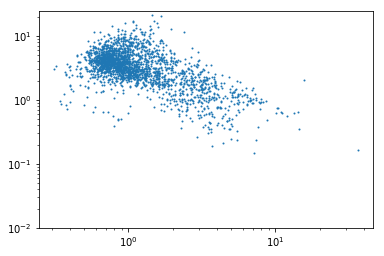

In [125]:
plt.scatter(blah4['parallax_expectation_value'], np.sqrt(blah4['parallax_variance'])/(blah4['E_d-dir-cor']/blah4['d-dir-cor']**2*1e3), s=1)
plt.xscale('log')
plt.yscale('log')
plt.ylim(0.01, 25)